In [75]:
from tensorflow import keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.regularizers import l2

In [212]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 32
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [213]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [214]:
def plot_images(images, labels):
  fig, axes = plt.subplots(1, len(images), figsize = (10, 5))
  for im, l, ax in zip(images, labels, axes):
    ax.imshow(im.reshape(32, 32, 3))
    ax.set_title(l.argmax())

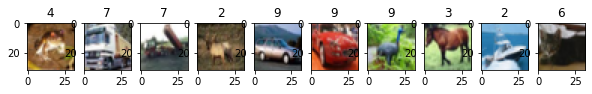

In [215]:
plot_images(x_train[:10], y_train[10:20])

In [216]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [217]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [218]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [219]:
# запуск data augmentation через fit_generator
history = model.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/32


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


391/391 [==============================] - 28s 69ms/step - loss: 1.8072 - accuracy: 0.3490 - val_loss: 1.5285 - val_accuracy: 0.4656
Epoch 2/32
391/391 [==============================] - 28s 71ms/step - loss: 1.5455 - accuracy: 0.4442 - val_loss: 1.4122 - val_accuracy: 0.4876
Epoch 3/32
391/391 [==============================] - 27s 68ms/step - loss: 1.4110 - accuracy: 0.4941 - val_loss: 1.3140 - val_accuracy: 0.5366
Epoch 4/32
391/391 [==============================] - 26s 66ms/step - loss: 1.3225 - accuracy: 0.5260 - val_loss: 1.2112 - val_accuracy: 0.5730
Epoch 5/32
391/391 [==============================] - 26s 66ms/step - loss: 1.2524 - accuracy: 0.5538 - val_loss: 1.1135 - val_accuracy: 0.6044
Epoch 6/32
391/391 [==============================] - 26s 66ms/step - loss: 1.1941 - accuracy: 0.5752 - val_loss: 1.0413 - val_accuracy: 0.6285
Epoch 7/32
391/391 [==============================] - 26s 65ms/step - loss: 1.1438 - accuracy: 0.5957 - val_loss: 1.1168 - val_accuracy: 0.6037
Epo

In [220]:
# # сохранение модели и весов
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('сохранить обученную модель как %s ' % model_path)


In [221]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_137 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 activation_188 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 conv2d_138 (Conv2D)         (None, 30, 30, 64)        18496     
                                                                 
 activation_189 (Activation)  (None, 30, 30, 64)       0         
                                                                 
 dropout_90 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 conv2d_139 (Conv2D)         (None, 30, 30, 64)        36928     
                                                                 
 activation_190 (Activation)  (None, 30, 30, 64)     

In [222]:

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.6513 - accuracy: 0.7739
Test loss: 0.6512594819068909
Test accuracy: 0.7738999724388123


<Figure size 432x288 with 0 Axes>

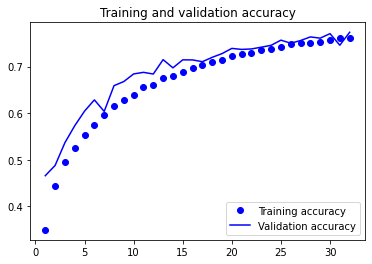

<Figure size 432x288 with 0 Axes>

In [223]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

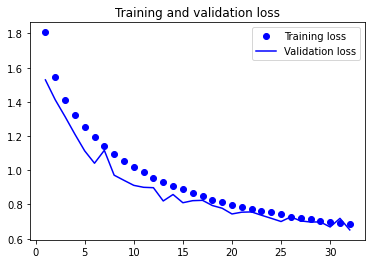

In [224]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()